# Project 2  (Ishant Kundra)

# Part 1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style = "ticks")
from scipy import stats
from scipy.stats import zscore

from sklearn import preprocessing
from sklearn import neighbors, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Part 1.1 a

In [2]:
# Read 3 CSV Files
A_df1 = pd.read_csv ( r'desktop/data/normal.csv' )
A_df2 = pd.read_csv ( r'desktop/data/Type_H.csv' ) 
A_df3 = pd.read_csv ( r'desktop/data/Type_S.csv' )
                  

# ---------------------------------------------------------------------------------------------------------------

## Part 1.1 b

In [3]:
# Shape and Column of three dataframes.
As1 = A_df1.shape
As2 = A_df2.shape
As3 = A_df3.shape
Ac1 = A_df1.size
Ac2 = A_df2.size
Ac3 = A_df3.size
print("Shape and columns of A_df1 :" ,As1,Ac1)
print("Shape and columns of A_df2 :" ,As2,Ac2)
print("Shape and columns of A_df3 :" ,As3,Ac3)

Shape and columns of A_df1 : (100, 7) 700
Shape and columns of A_df2 : (60, 7) 420
Shape and columns of A_df3 : (150, 7) 1050


In [4]:
print("Columns of First Dataset :")
for col in A_df1.columns:
    print(col)

Columns of First Dataset :
P_incidence
P_tilt
L_angle
S_slope
P_radius
S_Degree
Class


In [5]:
print("Columns of Second Dataset :")
for col in A_df2.columns:
    print(col)

Columns of Second Dataset :
P_incidence
P_tilt
L_angle
S_slope
P_radius
S_Degree
Class


In [6]:
print("Columns of Third Dataset :")
for col in A_df3.columns:
    print(col)

Columns of Third Dataset :
P_incidence
P_tilt
L_angle
S_slope
P_radius
S_Degree
Class


# ---------------------------------------------------------------------------------------------------------------

##  Part 1.1 c

In [7]:
A_df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [8]:
A_df1.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
95,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
96,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
97,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
99,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [9]:
A_df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [10]:
A_df2.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,Type_H
56,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,Type_H
57,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,Type_H
58,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,Type_H
59,48.109236,14.930725,35.564683,33.178512,124.056452,7.947905,Type_H


In [11]:
A_df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [12]:
A_df3.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
149,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


####  By Obeserving above data:
1.The majority of the feature attributes are of the float type and are all complete.

2.In all three dataframes, the column names are the same.

3.The three dataframes all have the same amount of columns (seven).

# ---------------------------------------------------------------------------------------------------------------

## Part 1.1 d - Print DataTypes of all the 3 DataFrames.

In [13]:
A_df1.dtypes # Datatypes of first dataframe

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [14]:
A_df2.dtypes # Datatypes of second dataframe

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [15]:
A_df3.dtypes # Datatypes of third dataframe

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

####  Except for Class, the majority of the properties are of type "Float."

*   List item
*   List item

attribute which is "Object" type.

# ---------------------------------------------------------------------------------------------------------------

## Part 1.1 e - Observe and share variation in ‘Class’ feature of all the 3 DaraFrames

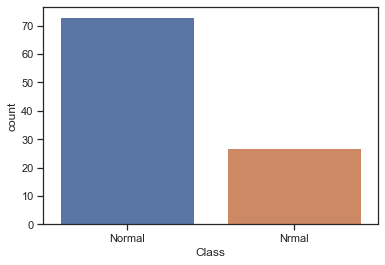

In [16]:
sns.countplot(x='Class',data=A_df1);

In [17]:
A_df1.Class.value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

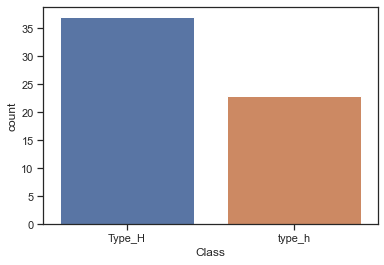

In [18]:
sns.countplot(x='Class',data=A_df2);

In [19]:
A_df2.Class.value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

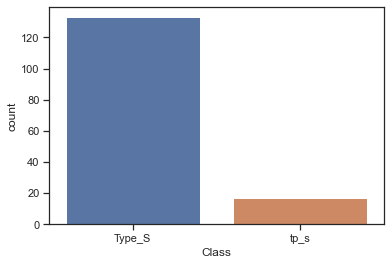

In [20]:
sns.countplot(x='Class',data=A_df3);

In [21]:
A_df3.Class.value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

#### Cleaning is needed because the By Observation Class attribue contains some inconsistent data.


# ---------------------------------------------------------------------------------------------------------------

## Part 1.2 a - Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [22]:
A_df1 = A_df1.replace(to_replace ='Nrmal', value = 'Normal', regex = True)
A_df2 = A_df2.replace(to_replace ='type_h', value = 'Type_H', regex = True)
A_df3 = A_df3.replace(to_replace ='tp_s', value = 'Type_S', regex = True)

In [23]:
A_df1.Class.value_counts()

Normal    100
Name: Class, dtype: int64

In [24]:
A_df2.Class.value_counts()

Type_H    60
Name: Class, dtype: int64

In [25]:
A_df3.Class.value_counts()

Type_S    150
Name: Class, dtype: int64

# ---------------------------------------------------------------------------------------------------------------

## Part 1.2 b - Combine all the 3 DataFrames to form a single DataFrame

In [26]:
data_frames = [A_df1, A_df2, A_df3]
A_df = pd.concat((data_frames),ignore_index = True)

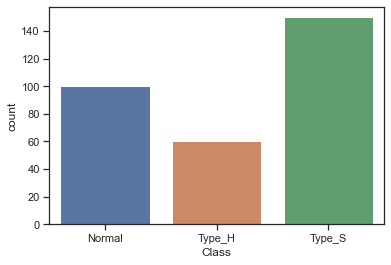

In [28]:
sns.countplot(data=A_df,x='Class');

In [29]:
A_df.head(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [30]:
A_df.tail(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
309,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


In [31]:
A_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


#### Merged dataset contains 310 rows and 7 columns.


# ---------------------------------------------------------------------------------------------------------------

## Part 1.2 c - Print 5 random samples of this DataFrame

In [32]:
sampleDataSet = A_df.sample(n=5)
print("Random sample 1 :")
print(sampleDataSet)

Random sample 1 :
     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
10     44.489275  21.786433  31.474154  22.702842  113.778494  -0.284129   
128    44.551012  21.931147  26.785916  22.619865  111.072920   2.652321   
271    78.401254  14.042260  79.694263  64.358994  104.731234  12.392853   
273    50.825029   9.064729  56.300000  41.760300   78.999454  23.041524   
196    96.657315  19.461581  90.211498  77.195734  120.673041  64.080998   

      Class  
10   Normal  
128  Type_H  
271  Type_S  
273  Type_S  
196  Type_S  


In [33]:
sampleDataSet = A_df.sample(n=5)
print("Random sample 2 :")
print(sampleDataSet)

Random sample 2 :
     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
137    35.703458  19.443253  20.700000  16.260205  137.540613  -0.263490   
76     61.734875  17.114312  46.900000  44.620563  120.920200   3.087726   
110    49.706610  13.040974  31.334500  36.665635  108.648265  -7.825986   
269    44.253476   1.101087  38.000000  43.152390   98.274107  23.910635   
70     50.086153  13.430044  34.457541  36.656108  119.134622   3.089484   

      Class  
137  Type_H  
76   Normal  
110  Type_H  
269  Type_S  
70   Normal  


In [34]:
sampleDataSet = A_df.sample(n=5)
print("Random sample 3:")
print(sampleDataSet)

Random sample 3:
     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
88     66.507179  20.897672  31.727471  45.609507  128.902905   1.517203   
255    66.804796  14.551602  72.084912  52.253195   82.456038  41.685474   
202    70.399308  13.469986  61.200000  56.929322  102.337524  25.538429   
95     47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395   
41     40.746996   1.835524  50.000000  38.911472  139.247150   0.668557   

      Class  
88   Normal  
255  Type_S  
202  Type_S  
95   Normal  
41   Normal  


In [35]:
sampleDataSet = A_df.sample(n=5)
print("Random sample 4:")
print(sampleDataSet)

Random sample 4:
     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
307    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
75     67.804694  16.550662  43.256802  51.254033  119.685645    4.867540   
176    86.753609  36.043016  69.221045  50.710593  139.414504  110.860782   
223    65.665347  10.540675  56.489135  55.124672  109.162777   53.932020   
155    47.657730  13.277385  36.679985  34.380345   98.249781    6.273012   

      Class  
307  Type_S  
75   Normal  
176  Type_S  
223  Type_S  
155  Type_H  


In [36]:
sampleDataSet = A_df.sample(n=5)
print("Random sample 5:")
print(sampleDataSet)

Random sample 5:
     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree  \
60     51.311771   8.875541  57.000000  42.436230  126.472258 -2.144044   
11     54.950970   5.865353  53.000000  49.085617  126.970328 -0.631603   
94     45.075450  12.306951  44.583177  32.768499  147.894637 -8.941709   
134    59.595540  31.998244  46.560252  27.597296  119.330354  1.474286   
158    43.203185  19.663146  35.000000  23.540039  124.846109 -2.919076   

      Class  
60   Normal  
11   Normal  
94   Normal  
134  Type_H  
158  Type_H  


# ---------------------------------------------------------------------------------------------------------------

## Part 1.2 d

In [38]:
A_df.isnull().sum()*100/len(A_df) # Calculates percentage of null values for each columns

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

#### The percentage of null values for each feature is zero.
> Indented block



# ---------------------------------------------------------------------------------------------------------------

## Part 1.2 e

In [39]:
summary=A_df.describe().T 
summary.iloc[:,[3,4,5,6,7]]

,min,25%,50%,75%,max
P_incidence,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,-11.058179,1.603727,11.767934,41.287352,418.543082


# ---------------------------------------------------------------------------------------------------------------

## Part 1.3 a

In [40]:
# Calculates correlation matrix
correlation = A_df.corr()
correlation

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


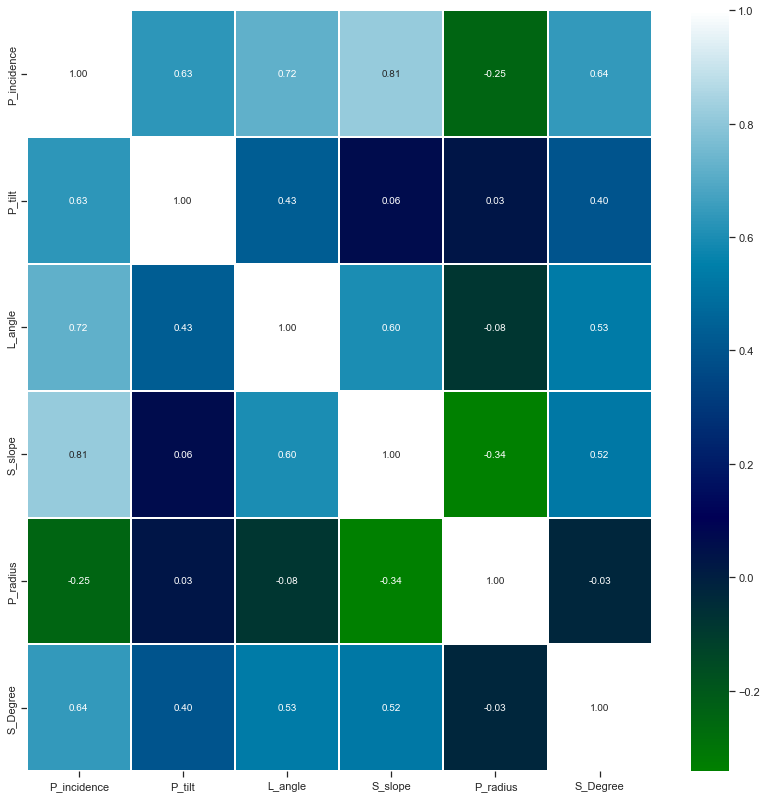

In [41]:
#Plot Heat Map of Correlation Matrixs
fig,ax = plt.subplots(figsize=(14,14))
sns.heatmap(data=correlation,annot=True,linewidths=0.05, fmt='.2f',cmap="ocean");

# ---------------------------------------------------------------------------------------------------------------

## Part 1.3 b - Share insights on correlation

#### 
### Features that correlate with correlation value more strongly. 

(1). 

Strongly correlated positively with P tilt (r = 0.63), L angle (r = 0.72), S slope (r = 0.81), and S Degree is P incidence (0.64) 


(2). 

Strong positive association exists between L angle and S slope (0.6)

### B. Features that correlate with correlation value less strongly.

(1).

P incidence and P radius have a modest negative connection (-0.25) 

(2). 

P tilt has no association with S slope or P radius, and only a weakly positive correlation with L angle and S Degree (0.033) 

(3). 

S Degree and L angle have a somewhat positive connection (0.53), whereas P radius has no correlation (-0.08). 

(4). 

Slope and S Degree have a weak positive correlation of 0.52 and a weak negative correlation of 0.42, respectively (-0.34) 

(5). 

P radius and S degree do not correlate (-0.026)

# ---------------------------------------------------------------------------------------------------------------

## Part 1.3 c

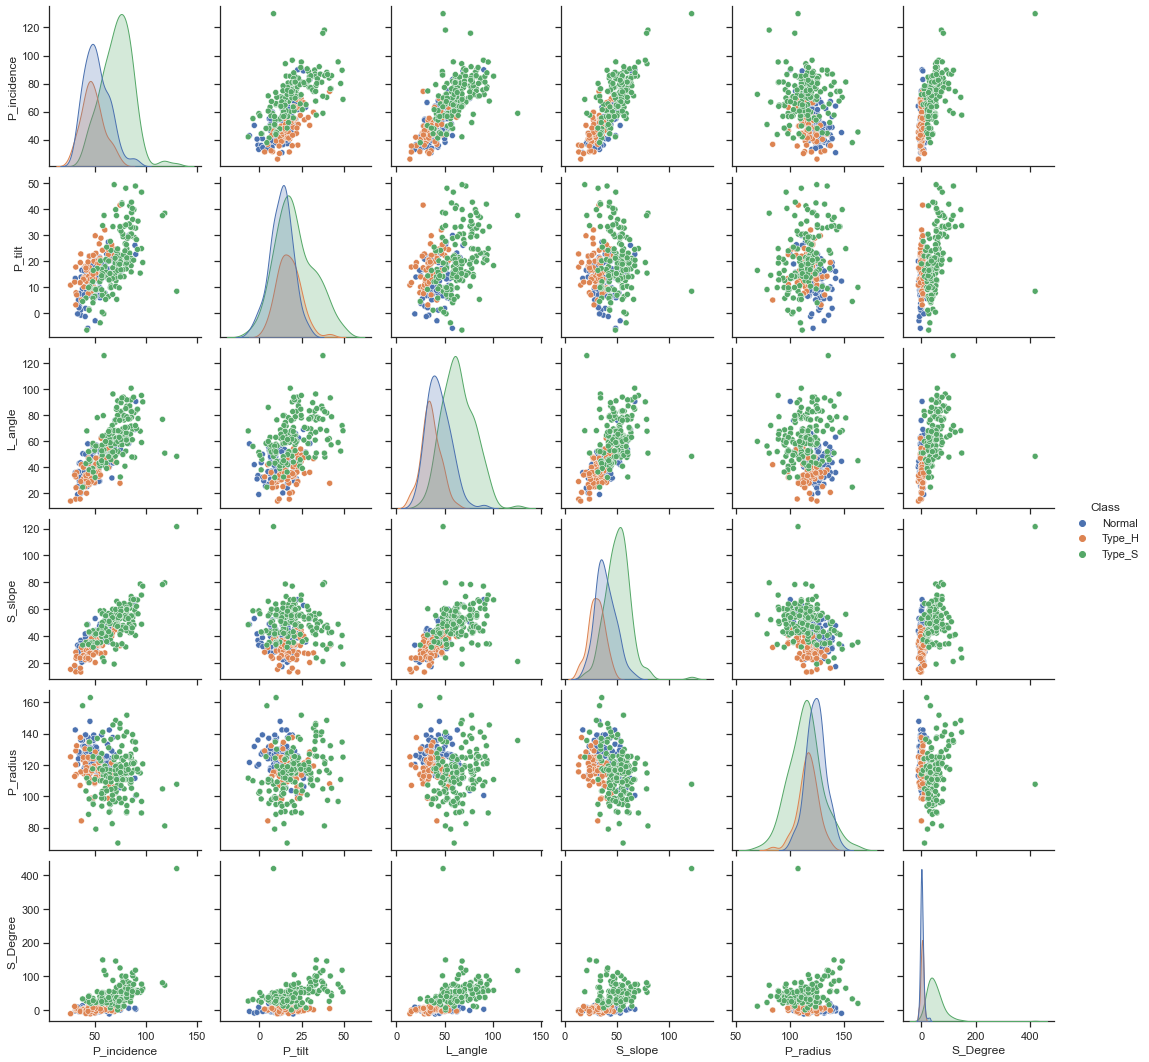

In [42]:
sns.pairplot(data=A_df,hue = "Class")
plt.show()

#### 

 1. With the exception of the variable S Degree, Type S class variables appear to be regularly distributed. 

2. All classes are uniformly distributed for P radius. 

3. Normal and Type H are strongly right-skewed for S Degree. 

4. Normal and Type H classes are right-skewed for P incidence, S slope, and L angle as well. 

5. Data from the scatter plots do not appear to be linearly separable by classes. 

6. In the majority of scatter plots, overlapping groups of classes may be noticed.

# ---------------------------------------------------------------------------------------------------------------

## Part 1.3 d

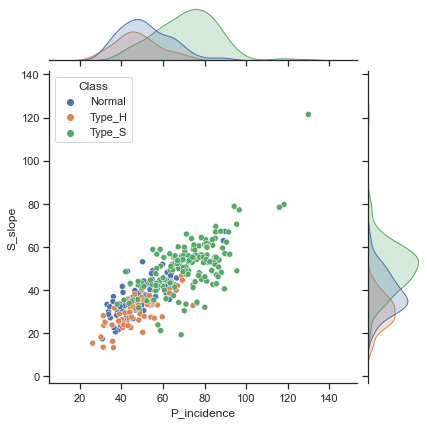

In [43]:
sns.jointplot(x = 'P_incidence',y = 'S_slope',data = A_df,hue= "Class");

#### 
1. The correlation between P incidence and S slope is positive. 

2. There is class overlap between these two variables, and they cannot be separated linearly. 

3. Between these two variables, Type S looks to be a regularly distributed class. 

4. Type S denoted variable has the highest value and Type H denoted variable has the lowest value class in terms of magnitude. 

5. P incidence and S slope are skewed for the Normal and Type H indicated classes. 

# ---------------------------------------------------------------------------------------------------------------

## Part 1.3 e


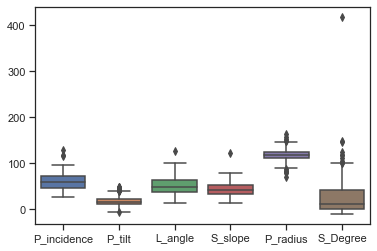

In [44]:
# Plot a boxplot for the entire dataframe
sns.boxplot(data=A_df);

1. The number of outliers is larger for P radius, P tilt, and S Degree. 

2. There are comparatively fewer outliers for P incidence, L angle, and S slope. 

3. The scales of each numerical variable vary, with P radius having very high values and P tilt having low ones. 

4. S Degree column data is skewed because there is disproportionately more data above (higher Q3) than below the median line. 

5. Other variables appear to have a normal distribution since the median (Q2) is located in the middle.

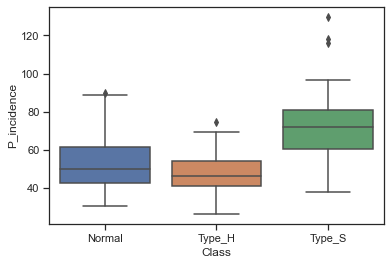

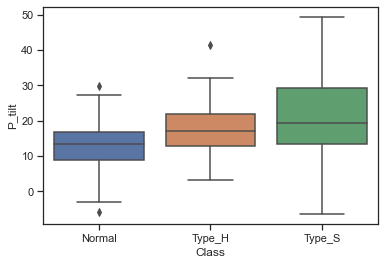

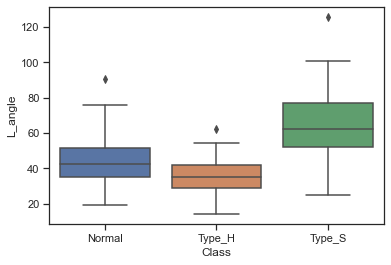

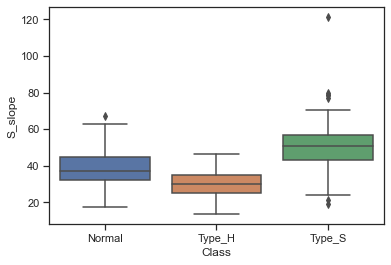

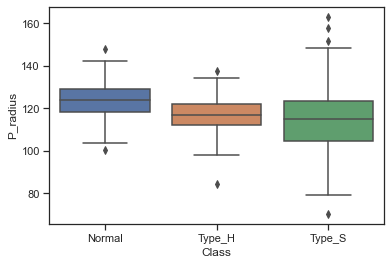

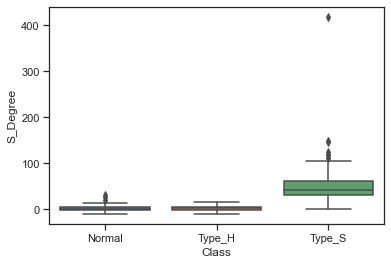

In [45]:
columns = ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for column in columns:
    sns.boxplot(x='Class', y=column, data= A_df)
    plt.show()


#### Class vs p incidence 
1. In comparison to the other two classes, Type S class has more outliers. 
2. The three groups of data are typically dispersed differently. 

#### Class versus P tilt 1. 
1. P tilt is generally distributed across all classes and does not contain many outliers. 

#### Class vs. L-angle 
1. L angle is normally distributed over all classes and does not contain many outliers. 
2. Because the box for the Type S class is located above the boxes for the other two classes, its values have a greater scale (magnitude). 

#### Class vs Slope 
More outliers are found in Type S class.

Data has a typical distribution. 

#### Class vs P_radius
Class has a higher percentage of outliers as compared to P radius Type S. 

Data has a typical distribution. 

#### Class versus S-degree 
The scale (magnitude) of the Normal and Type H classes in S Degree is smaller than that of the Type S class. 

Compared to the other two classes, the Type S class has more outliers.


# ---------------------------------------------------------------------------------------------------------------

# Part 1.4 a

In [46]:
# Splits data into X
X = A_df.drop(labels= "Class" , axis = 1)
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [47]:
Y = A_df['Class']
Y

0      Normal
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
305    Type_S
306    Type_S
307    Type_S
308    Type_S
309    Type_S
Name: Class, Length: 310, dtype: object

# ---------------------------------------------------------------------------------------------------------------

## Part 1.4 b

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20,random_state=1)

In [53]:
print(X_train.shape)
print(Y_train.shape)


(248, 6)
(248,)


In [55]:
print(X_test.shape)
print(Y_test.shape)

(62, 6)
(62,)


# ---------------------------------------------------------------------------------------------------------------


## Part 1.4 c

In [65]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train,Y_train)
#knn_pred = knn.predict(X_test)
#knn_pred

KNeighborsClassifier()

# ---------------------------------------------------------------------------------------------------------------


## Part 1.4 d

In [58]:
# Predict the Test Dataset
y_pred = knn1.predict(X_test)
y_pred

array(['Normal', 'Type_S', 'Normal', 'Normal', 'Normal', 'Normal',
       'Type_S', 'Type_H', 'Type_H', 'Type_S', 'Type_S', 'Type_S',
       'Normal', 'Normal', 'Type_S', 'Type_H', 'Type_S', 'Type_S',
       'Type_S', 'Normal', 'Type_S', 'Type_S', 'Normal', 'Type_S',
       'Normal', 'Type_S', 'Normal', 'Type_S', 'Normal', 'Type_S',
       'Type_S', 'Type_S', 'Type_S', 'Type_S', 'Normal', 'Normal',
       'Normal', 'Type_S', 'Type_H', 'Type_H', 'Type_S', 'Type_S',
       'Normal', 'Type_S', 'Type_S', 'Type_H', 'Type_S', 'Type_S',
       'Type_S', 'Type_S', 'Normal', 'Type_S', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Type_H', 'Type_H',
       'Normal', 'Type_S'], dtype=object)

In [60]:
# Print Train Data Performance
knn1.score(X_train,Y_train)

0.8911290322580645

In [61]:
# Print Test Data Performance
knn1.score(X_test,Y_test)

0.8387096774193549

In [62]:
# Predict from Training Dataset
y_pred_train = knn1.predict(X_train)
y_pred_train

array(['Type_S', 'Type_H', 'Type_H', 'Type_S', 'Normal', 'Type_S',
       'Type_S', 'Type_S', 'Type_H', 'Normal', 'Type_S', 'Type_S',
       'Type_S', 'Type_H', 'Type_H', 'Type_S', 'Type_S', 'Type_S',
       'Normal', 'Type_H', 'Type_S', 'Type_S', 'Normal', 'Type_H',
       'Type_H', 'Normal', 'Normal', 'Type_S', 'Normal', 'Type_S',
       'Normal', 'Normal', 'Type_S', 'Type_H', 'Normal', 'Type_S',
       'Type_S', 'Type_S', 'Normal', 'Type_S', 'Type_S', 'Type_S',
       'Normal', 'Normal', 'Normal', 'Type_S', 'Type_S', 'Normal',
       'Type_S', 'Type_H', 'Normal', 'Type_H', 'Type_H', 'Type_S',
       'Normal', 'Normal', 'Type_S', 'Type_H', 'Type_S', 'Type_H',
       'Type_H', 'Normal', 'Normal', 'Normal', 'Type_S', 'Type_S',
       'Normal', 'Type_H', 'Normal', 'Normal', 'Type_S', 'Normal',
       'Type_S', 'Type_S', 'Normal', 'Normal', 'Type_S', 'Normal',
       'Type_S', 'Type_S', 'Normal', 'Type_S', 'Type_H', 'Type_S',
       'Type_S', 'Type_S', 'Normal', 'Type_S', 'Type_S', 'Norm

Confusion Matrix for Training Data


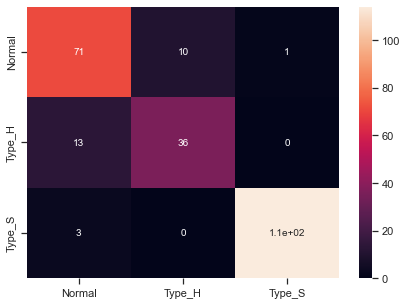

In [68]:
print("Confusion Matrix for Training Data")
cm1=metrics.confusion_matrix(Y_train, y_pred_train, labels=["Normal", "Type_H", "Type_S"])

A_df_cm1 = pd.DataFrame(cm1, index = [i for i in ["Normal", "Type_H", "Type_S"]],columns = [i for i in ["Normal", "Type_H", "Type_S"]])
plt.figure(figsize = (7,5));
sns.heatmap(A_df_cm1, annot=True);

Confusion Matrix for Test Data


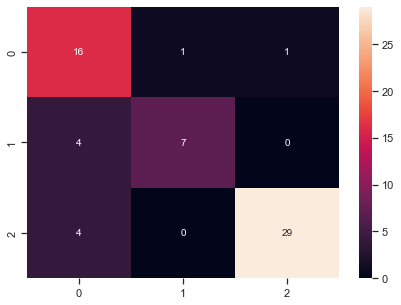

In [70]:
# Confusion matrix for Test Data

print("Confusion Matrix for Test Data")
A_df_cm1=metrics.confusion_matrix(Y_test, y_pred, labels=["Normal", "Type_H", "Type_S"])

df_cm1 = pd.DataFrame(cm1, index = [i for i in ["Normal", "Type_H", "Type_S"]],columns = [i for i in ["Normal", "Type_H", "Type_S"]])

plt.figure(figsize = (7,5));
sns.heatmap(A_df_cm1, annot=True);

In [72]:
target_names = ['Normal','Type_H','Type_S']
print(classification_report(Y_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.82      0.87      0.84        82
      Type_H       0.78      0.73      0.76        49
      Type_S       0.99      0.97      0.98       117

    accuracy                           0.89       248
   macro avg       0.86      0.86      0.86       248
weighted avg       0.89      0.89      0.89       248



In [73]:
print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.67      0.89      0.76        18
      Type_H       0.88      0.64      0.74        11
      Type_S       0.97      0.88      0.92        33

    accuracy                           0.84        62
   macro avg       0.84      0.80      0.81        62
weighted avg       0.86      0.84      0.84        62



# ---------------------------------------------------------------------------------------------------------------


## Part 1.5 a

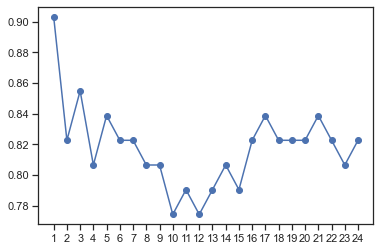

In [75]:
# Check for optimal value of k
kscores = []
for i in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, Y_train)
  s = knn.score(X_test, Y_test)
  kscores.append(s)
plt.plot(range(1,25), kscores, 'o-')   
plt.xticks(range(1,25))
plt.show()

In [76]:
knn2 = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn2.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [77]:
# Predict the Test Dataset
y_pred2 = knn2.predict(X_test)
y_pred2

array(['Normal', 'Type_S', 'Type_S', 'Normal', 'Normal', 'Type_H',
       'Type_S', 'Type_H', 'Normal', 'Type_S', 'Type_S', 'Type_S',
       'Normal', 'Normal', 'Type_S', 'Type_H', 'Type_S', 'Type_S',
       'Type_S', 'Normal', 'Type_S', 'Type_S', 'Normal', 'Type_S',
       'Normal', 'Type_S', 'Normal', 'Type_S', 'Normal', 'Type_S',
       'Type_S', 'Type_S', 'Type_S', 'Type_S', 'Normal', 'Type_S',
       'Normal', 'Type_S', 'Type_H', 'Type_H', 'Type_S', 'Type_S',
       'Normal', 'Type_S', 'Type_S', 'Type_H', 'Type_S', 'Type_S',
       'Type_S', 'Type_S', 'Normal', 'Type_S', 'Normal', 'Type_H',
       'Normal', 'Normal', 'Normal', 'Type_H', 'Normal', 'Type_H',
       'Normal', 'Type_S'], dtype=object)

In [79]:
# Print Train Data Performance
knn2.score(X_train,Y_train)

1.0

In [80]:
# Print Test Data Performance
knn2.score(X_test,Y_test)

0.9032258064516129

In [82]:
# Calculate performance metrics
print(classification_report(Y_test, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.81      0.94      0.87        18
      Type_H       0.89      0.73      0.80        11
      Type_S       0.97      0.94      0.95        33

    accuracy                           0.90        62
   macro avg       0.89      0.87      0.88        62
weighted avg       0.91      0.90      0.90        62



In [86]:
# Change weights parameter in the above model
knn3 = KNeighborsClassifier(n_neighbors = 1, weights='distance')
knn3.fit(X_train, Y_train)
y_pred3 = knn3.predict(X_test)
print("Accuracy on Training Data:",knn3.score(X_train,Y_train))
# Print Test Data Performance
print("Accuracy on Test Data:",knn3.score(X_test,Y_test))
# Calculate performance metrics
print(classification_report(Y_test, y_pred3, target_names=target_names))

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.9032258064516129
              precision    recall  f1-score   support

      Normal       0.81      0.94      0.87        18
      Type_H       0.89      0.73      0.80        11
      Type_S       0.97      0.94      0.95        33

    accuracy                           0.90        62
   macro avg       0.89      0.87      0.88        62
weighted avg       0.91      0.90      0.90        62



# ---------------------------------------------------------------------------------------------------------------


## Part 1.5 b

In [88]:
# We will compare the first two models
print("Default KNN (k=5) Model Performance")
print(classification_report(Y_test, y_pred, target_names=target_names))

Default KNN (k=5) Model Performance
              precision    recall  f1-score   support

      Normal       0.67      0.89      0.76        18
      Type_H       0.88      0.64      0.74        11
      Type_S       0.97      0.88      0.92        33

    accuracy                           0.84        62
   macro avg       0.84      0.80      0.81        62
weighted avg       0.86      0.84      0.84        62



In [90]:
print("Modified KNN (k=1) Model Performance")
print(classification_report(Y_test, y_pred2, target_names=target_names))

Modified KNN (k=1) Model Performance
              precision    recall  f1-score   support

      Normal       0.81      0.94      0.87        18
      Type_H       0.89      0.73      0.80        11
      Type_S       0.97      0.94      0.95        33

    accuracy                           0.90        62
   macro avg       0.89      0.87      0.88        62
weighted avg       0.91      0.90      0.90        62



#### The overall accuracy increased by 6%.
#### Precision Improvement
1.Normal Class = 14%,
2.Type_H Class = 1%,
3.Type_S Class = 0%
#### Recall Improvement
1.Normal Class = 5%,
2.Type_H Class = 9%,
3.Type_S Class = 6%
#### F1-Score Improvement
1.Normal Class = 11%,
2.Type_H Class = 6%,
3.Type_S Class = 3%

## Part 1.5 c - Clearly state which parameters contributed most to improve model performance. 

#### 
1. By changing the k parameter from its default value of 5 to 1, the model's performance significantly improved. 

2. The amount of data provided is insufficient for model design, and adding weights did not further enhance the model's performance.

# ---------------------------------------------------------------------------------------------------------------


# Part 2

## Part 2.1 a

In [91]:
# Read CSV Files
B_df1 = pd.read_csv(r"desktop/data/Data1.csv")
B_df2 = pd.read_csv(r"desktop/data/Data2.csv")

# ---------------------------------------------------------------------------------------------------------------


## Part 2.1 b - Print shape and Column Names and DataTypes of both the Dataframes.

In [92]:
B_df1.shape

(5000, 8)

In [93]:
B_df2.shape

(5000, 7)

In [94]:
print("Columns of First Dataset:")
for col in B_df1.columns:
    print(col)

Columns of First Dataset:
ID
Age
CustomerSince
HighestSpend
ZipCode
HiddenScore
MonthlyAverageSpend
Level


In [95]:
print("Columns of Second Dataset:")
for col in B_df2.columns:
    print(col)

Columns of Second Dataset:
ID
Mortgage
Security
FixedDepositAccount
InternetBanking
CreditCard
LoanOnCard


In [96]:
B_df1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [97]:
B_df2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

# ---------------------------------------------------------------------------------------------------------------


## Part 2.1 c

In [98]:
B_df = pd.merge(B_df1, B_df2, how='outer')

In [99]:
B_df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [100]:
B_df.tail()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,1,1,0.0


In [101]:
B_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


# ---------------------------------------------------------------------------------------------------------------



# ---------------------------------------------------------------------------------------------------------------


## Part 2.1 d

In [102]:
Objs_columns=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard',]

In [103]:
for i in Objs_columns:
    B_df[i]=B_df[i].astype('object')

In [104]:
B_df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

# ---------------------------------------------------------------------------------------------------------------


## Part 2.2 a

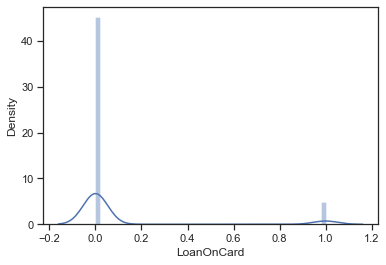

In [105]:
# LoanOnCard is an Object DataType
sns.distplot(B_df['LoanOnCard']);

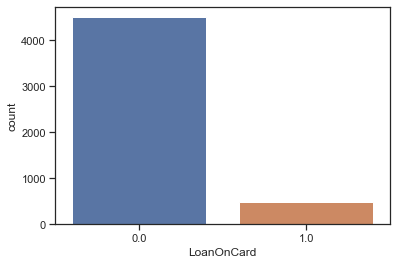

In [106]:
sns.countplot(B_df['LoanOnCard']);

In [107]:
B_df['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [108]:
B_df['LoanOnCard'].isnull().sum()

20

#### 
1.The variable LoanOnCard has two categories and is a categorical variable. 

(a)0 = No Credit Card Loan 

(b)1 = Credit Card Loan 

2.The LoanOnCard variable contains 20 Null/NaN values.

# ---------------------------------------------------------------------------------------------------------------


## Part 2.2 b

In [109]:
B_df.isnull().sum()*100/len(B_df)

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

#### 
1. There are no missing values for any variables other than "LoanOnCard." 

2. 0.4% of the LoanOnCard variable data as a whole lacks values.

# ---------------------------------------------------------------------------------------------------------------


## Part 2.2 c

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

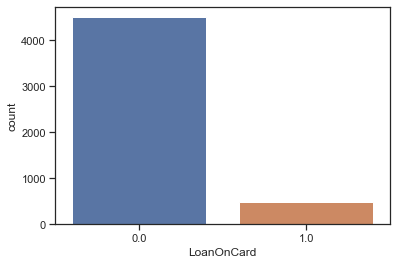

In [110]:
sns.countplot(x=B_df['LoanOnCard'])

In [112]:
# Drop Missing Rows
B_df = B_df.dropna()
B_df = B_df.reset_index(drop=True)
B_df.head(n=10)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
1,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
2,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
3,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
4,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
5,15,67,41,112,91741,1,2.0,1,0,1,0,0,0,0.0
6,16,60,30,22,95054,1,1.5,3,0,0,0,1,1,0.0
7,17,38,14,130,95010,4,4.7,3,134,0,0,0,0,1.0
8,18,42,18,81,94305,4,2.4,1,0,0,0,0,0,0.0
9,19,46,21,193,91604,2,8.1,3,0,0,0,0,0,1.0


In [113]:
B_df['LoanOnCard'] = B_df.LoanOnCard.astype('category') # Change datatype of LoanOnCard

In [117]:
B_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4980 entries, 0 to 4979
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   4980 non-null   int64   
 1   Age                  4980 non-null   int64   
 2   CustomerSince        4980 non-null   int64   
 3   HighestSpend         4980 non-null   int64   
 4   ZipCode              4980 non-null   int64   
 5   HiddenScore          4980 non-null   object  
 6   MonthlyAverageSpend  4980 non-null   float64 
 7   Level                4980 non-null   object  
 8   Mortgage             4980 non-null   int64   
 9   Security             4980 non-null   object  
 10  FixedDepositAccount  4980 non-null   object  
 11  InternetBanking      4980 non-null   object  
 12  CreditCard           4980 non-null   object  
 13  LoanOnCard           4980 non-null   category
dtypes: category(1), float64(1), int64(6), object(6)
memory usage: 510.9+ KB


<AxesSubplot:xlabel='HiddenScore', ylabel='count'>

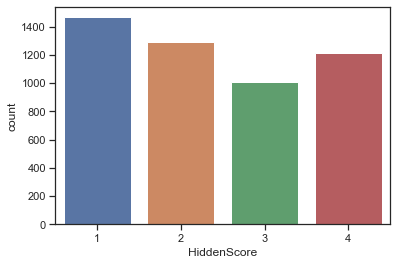

In [118]:
sns.countplot(x=B_df['HiddenScore'])

<AxesSubplot:xlabel='InternetBanking', ylabel='count'>

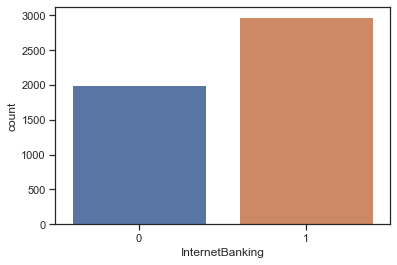

In [119]:
sns.countplot(x=B_df['InternetBanking'])

<AxesSubplot:xlabel='FixedDepositAccount', ylabel='count'>

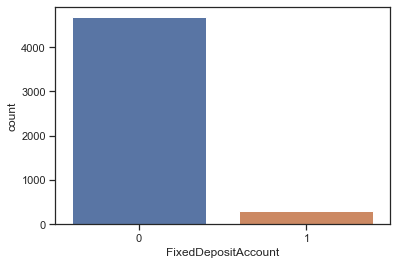

In [120]:
sns.countplot(x=B_df['FixedDepositAccount'])

<AxesSubplot:xlabel='Security', ylabel='count'>

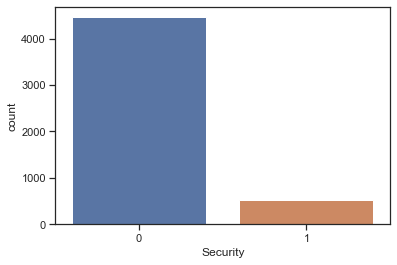

In [121]:
sns.countplot(x=B_df['Security'])

<AxesSubplot:xlabel='Level', ylabel='count'>

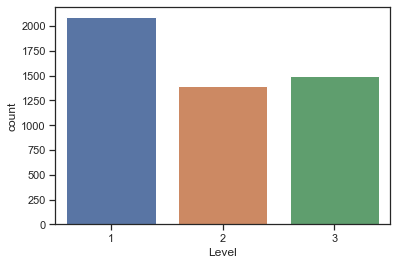

In [122]:
sns.countplot(x=B_df['Level'])

In [123]:
B_df.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,2510.345382,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759
std,1438.011129,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758
min,10.000000,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000
25%,1265.750000,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000
50%,2510.500000,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000
75%,3755.250000,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000
max,5000.000000,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000


# ---------------------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------------------

## Part 2.3 a

In [124]:
X = B_df.drop(['ID','ZipCode','LoanOnCard'], axis=1) # Drop ID, ZipCode and LoanOnCard
X.head() # Dispaly Variables

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,34,9,180,1,8.9,3,0,0,0,0,0
1,65,39,105,4,2.4,3,0,0,0,0,0
2,29,5,45,3,0.1,2,0,0,0,1,0
3,48,23,114,2,3.8,3,0,1,0,0,0
4,59,32,40,4,2.5,2,0,0,0,1,0


In [125]:
Y=B_df['LoanOnCard']
Y

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4975    0.0
4976    0.0
4977    0.0
4978    0.0
4979    0.0
Name: LoanOnCard, Length: 4980, dtype: category
Categories (2, float64): [0.0, 1.0]

# ---------------------------------------------------------------------------------------------------------------

## Part 2.3 b

In [129]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.25, random_state=2)
print("{0:0.2f}% data is set for training set".format((len(x_train)/len(B_df.index)) * 100))
print("{0:0.2f}% data is set for test set".format((len(x_test)/len(_df.index)) * 100))

75.00% data is set for training set
25.00% data is set for test set


In [130]:
print(x_train.shape)
print(y_train.shape)

(3735, 11)
(3735,)


In [131]:
print(x_test.shape)
print(y_test.shape)

(1245, 11)
(1245,)


# ---------------------------------------------------------------------------------------------------------------

## Part 2.3 c

In [132]:
LogReg1 = LogisticRegression(solver='liblinear',random_state=2) # Fit the model on train
LogReg1.fit(x_train, y_train)
y_predict1 = LogReg1.predict(x_test) # Predict on Test

# Print Accuracy of Test & Train Data
print('Accuracy of Training Data',LogReg1.score(x_train, y_train))
print('Accuracy of Test Data',LogReg1.score(x_test, y_test))
print("The accuracies of predicting classes in training data and test data is approx 95% in each case.")

Accuracy of Training Data 0.9504685408299867
Accuracy of Test Data 0.9534136546184739
The accuracies of predicting classes in training data and test data is approx 95% in each case.


## Part 2.3 d

Confusion Matrix


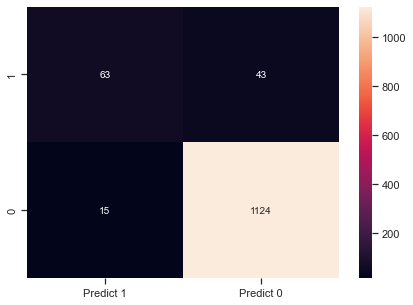

In [135]:
print('Confusion Matrix') # plot a confusion matrix 
cm1=metrics.confusion_matrix(y_test, y_predict1, labels=[1, 0])

B_df_cm1 = pd.DataFrame(cm1, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5));
sns.heatmap(B_df_cm1, annot=True, fmt='d');

In [136]:
target_names = ['1','0']
print(classification_report(y_test, y_predict1, target_names=target_names))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97      1139
           0       0.81      0.59      0.68       106

    accuracy                           0.95      1245
   macro avg       0.89      0.79      0.83      1245
weighted avg       0.95      0.95      0.95      1245



In [137]:
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict1)}')

Area Under Curve: 0.7905850878791393


#### 
1. As can be seen, the model performed poorly in predicting Class 1 when compared to Class 0. 
2. Accuracy is good in this situation, but we also need to consider recall value. 
3. This recall shows that just 49% of class 1 values were properly predicted. 
4. We do not have sufficient class 1 samples to train the model.

# ---------------------------------------------------------------------------------------------------------------

## Part 2.3 e

In [138]:
B_df.nunique()

ID                     4980
Age                      45
CustomerSince            47
HighestSpend            162
ZipCode                 467
HiddenScore               4
MonthlyAverageSpend     108
Level                     3
Mortgage                347
Security                  2
FixedDepositAccount       2
InternetBanking           2
CreditCard                2
LoanOnCard                2
dtype: int64

In [139]:
B_df["CreditCard"].value_counts(normalize=True) 

0    0.705622
1    0.294378
Name: CreditCard, dtype: float64

In [140]:
B_df["InternetBanking"].value_counts(normalize=True)

1    0.597189
0    0.402811
Name: InternetBanking, dtype: float64

In [141]:
B_df["FixedDepositAccount"].value_counts(normalize=True) 

0    0.939357
1    0.060643
Name: FixedDepositAccount, dtype: float64

In [142]:
B_df["Security"].value_counts(normalize=True) 

0    0.895582
1    0.104418
Name: Security, dtype: float64

In [143]:
print("Original LoanOnCard True Values    : {0} ({1:0.2f}%)".format(len(B_df.loc[B_df['LoanOnCard'] == 1]), (len(B_df.loc[B_df['LoanOnCard'] == 1])/len(B_df.index)) * 100))
print("Original LoanOnCard False Values   : {0} ({1:0.2f}%)".format(len(B_df.loc[B_df['LoanOnCard'] == 0]), (len(B_df.loc[B_df['LoanOnCard'] == 0])/len(B_df.index)) * 100))
print("")
print("Training LoanOnCard True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training LoanOnCard False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test LoanOnCard True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test LoanOnCard False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original LoanOnCard True Values    : 480 (9.64%)
Original LoanOnCard False Values   : 4500 (90.36%)

Training LoanOnCard True Values    : 374 (10.01%)
Training LoanOnCard False Values   : 3361 (89.99%)

Test LoanOnCard True Values        : 106 (8.51%)
Test LoanOnCard False Values       : 1139 (91.49%)



# Part 2.3 f

In [144]:
LogReg2 = LogisticRegression(solver='liblinear',random_state=2,class_weight='balanced')
LogReg2.fit(x_train, y_train)

y_predict2 = LogReg2.predict(x_test)

print('Accuracy of Training Data',LogReg2.score(x_train, y_train))
print('Accuracy of Test Data',LogReg2.score(x_test, y_test))


Accuracy of Training Data 0.8987951807228916
Accuracy of Test Data 0.8811244979919679


# Part 2.3 g

In [145]:
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict2)}')

Area Under Curve: 0.8708607351698776


Confusion Matrix


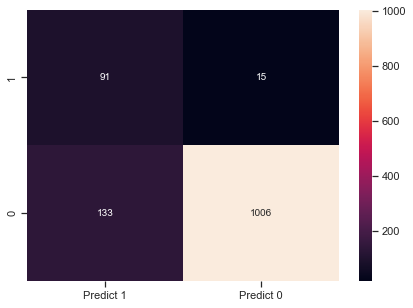

In [146]:
print('Confusion Matrix')
cm1=metrics.confusion_matrix(y_test, y_predict2, labels=[1, 0])
B_df_cm1 = pd.DataFrame(cm1, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(B_df_cm1, annot=True, fmt='d');

In [147]:
print(classification_report(y_test, y_predict2, target_names=target_names))

              precision    recall  f1-score   support

           1       0.99      0.88      0.93      1139
           0       0.41      0.86      0.55       106

    accuracy                           0.88      1245
   macro avg       0.70      0.87      0.74      1245
weighted avg       0.94      0.88      0.90      1245



Enhanced Performance Metrics 
Class 1 precision improvement: +3% (There is evidence of an increase in Class 1 precision.) 

Class 0: -40% (For Class 0, a decrease in precision is seen.) 

Class 1 recall improvement: -11% (There is a decline in Class 1 recall.) 

Class 0: +31% (There is a rise in recall for Class 0.) 

Class 1 F1-Score Improvement: -4% (A decrease in the F1-Score for Classes 1 and 0 is seen.) 

Class 0: -13% (A decrease in the F1-Score for Classes 1 and 0 is seen.) 

A -7% decrease in accuracy is also seen.

# Part 2.4 a

In [152]:
knn4 = KNeighborsClassifier()
knn4.fit(x_train, y_train)
y_pred4 = knn4.predict(x_test)
print('Accuracy of Training Data',knn4.score(x_train, y_train))
print('Accuracy of Test Data',knn4.score(x_test, y_test))

Accuracy of Training Data 0.9413654618473896
Accuracy of Test Data 0.9140562248995984


In [154]:
print(classification_report(y_test,y_pred4, target_names=target_names))

              precision    recall  f1-score   support

           1       0.95      0.96      0.95      1139
           0       0.49      0.42      0.45       106

    accuracy                           0.91      1245
   macro avg       0.72      0.69      0.70      1245
weighted avg       0.91      0.91      0.91      1245



In [155]:
print(f'Area Under Curve for KNN: {roc_auc_score(y_test, y_pred4)}')

Area Under Curve for KNN: 0.6877929994864743


In [156]:
print('Confusion Matrix - KNN')
cm1=metrics.confusion_matrix(y_test, y_pred4, labels=[1, 0])

Confusion Matrix - KNN


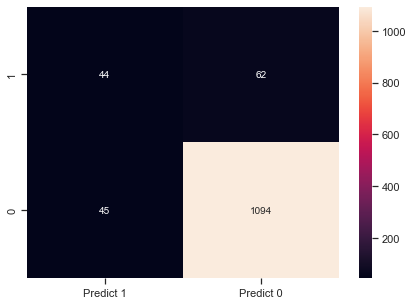

In [157]:
B_df_cm1 = pd.DataFrame(cm1, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(B_df_cm1, annot=True, fmt='d');

In [158]:
svc1 = SVC() # SVC Model
svc1.fit(x_train, y_train)

svc_y_pred = svc1.predict(x_test)

print(svc1.score(x_train, y_train))
print(svc1.score(x_test, y_test))

0.9078982597054887
0.9124497991967871


In [159]:
print(classification_report(y_test, svc_y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.92      0.98      0.95      1139
           0       0.45      0.14      0.22       106

    accuracy                           0.91      1245
   macro avg       0.69      0.56      0.58      1245
weighted avg       0.88      0.91      0.89      1245



In [160]:
print(f'Area Under Curve for KNN: {roc_auc_score(y_test, svc_y_pred)}')

Area Under Curve for KNN: 0.5628530488511936


Confusion Matrix - SVM


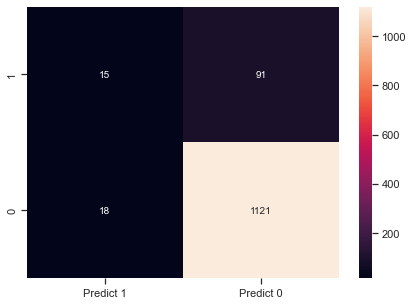

In [161]:
print('Confusion Matrix - SVM')
cm1=metrics.confusion_matrix(y_test, svc_y_pred, labels=[1, 0])

B_df_cm1 = pd.DataFrame(cm1, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(B_df_cm1, annot=True, fmt='d');

# Part 2.4 b

In [162]:
x_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3735.0,NaN,NaN,NaN,45.418206,11.488808,23.0,35.0,45.0,55.0,67.0
CustomerSince,3735.0,NaN,NaN,NaN,20.173226,11.510840,-3.0,10.0,20.0,30.0,43.0
HighestSpend,3735.0,NaN,NaN,NaN,73.781526,46.059775,8.0,39.0,63.0,99.0,224.0
HiddenScore,3735.0,4.0,1.0,1098.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyAverageSpend,3735.0,NaN,NaN,NaN,1.937282,1.744489,0.0,0.7,1.5,2.5,10.0
Level,3735.0,3.0,1.0,1556.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,3735.0,NaN,NaN,NaN,56.197323,101.504459,0.0,0.0,0.0,100.0,635.0
Security,3735.0,2.0,0.0,3337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FixedDepositAccount,3735.0,2.0,0.0,3500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetBanking,3735.0,2.0,1.0,2239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
col_names=['Age', 'CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']
xtrainsc = x_train
xtrainsc[col_names] = stats.zscore(xtrainsc[col_names])
xtrainsc.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
707,1.443493,1.462015,-1.211230,3,-0.365361,2,-0.553718,0,0,1,0
1346,1.269387,1.201357,-0.885523,2,-0.938671,1,0.441445,0,0,1,0
1516,-0.819882,-0.710141,-0.016970,4,0.035957,3,1.298665,0,0,1,0
3008,1.530546,1.635788,-0.776954,3,-1.053333,3,1.200134,0,0,1,1
764,0.224753,0.158722,0.525876,2,2.501191,1,-0.553718,0,0,0,0


In [164]:
xtestsc = x_test
xtestsc[col_names] = stats.zscore(xtestsc[col_names])
xtestsc.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
1302,-1.155250,-1.318453,-0.565398,2,-0.156415,2,-0.561838,1,1,1,1
3510,0.776632,0.709800,-0.543706,4,0.483292,2,-0.561838,1,0,0,0
4043,0.161942,0.092506,-1.086002,2,-1.045213,3,-0.561838,0,0,0,1
3017,-1.594314,-1.583008,1.820700,3,-0.875379,2,-0.561838,0,1,1,0
2146,-1.155250,-1.053899,-1.064310,3,-0.592322,3,-0.561838,0,0,1,1


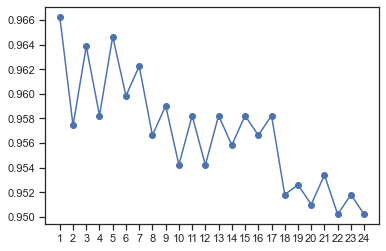

In [165]:
kscores = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrainsc, y_train)
    s = knn.score(xtestsc, y_test)
    kscores.append(s)
plt.plot(range(1,25), kscores, 'o-')   
plt.xticks(range(1,25))
plt.show()

In [166]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(xtrainsc, y_train)
y_pred5 = knn5.predict(xtestsc)
print('Accuracy of Training Data is:',knn5.score(xtrainsc, y_train))
print('Accuracy of Test Data is :',knn5.score(xtestsc, y_test))

Accuracy of Training Data is: 0.970281124497992
Accuracy of Test Data is : 0.9646586345381526


In [167]:
# Building a Support Vector Machine on train data
svc2 = SVC()
svc2.fit(xtrainsc, y_train)

SVC()

In [168]:
# check the accuracy on the training & test set
print(svc2.score(xtrainsc, y_train))
print(svc2.score(xtestsc, y_test))

0.9796519410977242
0.9751004016064257


In [169]:
svc3 = SVC(gamma=0.025, C=3)
svc3.fit(xtrainsc, y_train)
print(svc3.score(xtrainsc, y_train))
print(svc3.score(xtestsc, y_test))

0.978045515394913
0.9710843373493976


In [170]:
svc4 = SVC(C= 3, kernel='linear', gamma=0.025)
svc4.fit(xtrainsc, y_train)
print(svc4.score(xtrainsc, y_train))
print(svc4.score(xtestsc, y_test))

0.9528781793842035
0.9550200803212852


In [171]:
svc5 = SVC(kernel='rbf')
svc5.fit(xtrainsc, y_train)
print(svc5.score(xtrainsc, y_train))
print(svc5.score(xtestsc, y_test))

0.9796519410977242
0.9751004016064257


In [172]:
svc6 = SVC(kernel='poly')
svc6.fit(xtrainsc, y_train)
svc_y_pred6 = svc6.predict(xtestsc)
print(svc6.score(xtrainsc, y_train))
print(svc6.score(xtestsc, y_test))

0.9820615796519411
0.976706827309237


In [173]:
svc7 = SVC(kernel='sigmoid') ## Building a SVM on train data
svc7.fit(xtrainsc, y_train)
print(svc7.score(xtrainsc, y_train))
print(svc7.score(xtestsc, y_test))

0.8305220883534137
0.8337349397590361


# Part 2.4 c

In [174]:
print(classification_report(y_test, y_pred5, target_names=target_names))# Classification Report for KNN

              precision    recall  f1-score   support

           1       0.97      1.00      0.98      1139
           0       0.96      0.61      0.75       106

    accuracy                           0.96      1245
   macro avg       0.96      0.81      0.86      1245
weighted avg       0.96      0.96      0.96      1245



In [175]:
print(classification_report(y_test, svc_y_pred6, target_names=target_names))# Classification Report for SVM

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      1139
           0       0.94      0.77      0.85       106

    accuracy                           0.98      1245
   macro avg       0.96      0.88      0.92      1245
weighted avg       0.98      0.98      0.98      1245



In [176]:
print(f'Area Under Curve for KNN: {roc_auc_score(y_test, y_pred5)}') #ROC_AUC Score for KNN

Area Under Curve for KNN: 0.8052868288965825


In [177]:
print(f'Area Under Curve for SVM: {roc_auc_score(y_test, svc_y_pred6)}') #ROC_AUC Score for SVM

Area Under Curve for SVM: 0.8845975450163168


Confusion Matrix - KNN


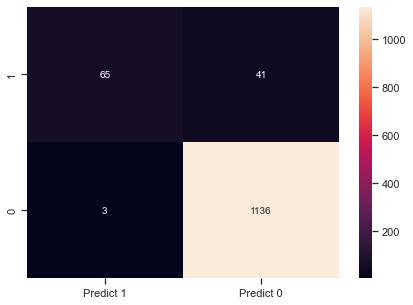

In [178]:
print('Confusion Matrix - KNN') #Confusion Matrix for KNN
cm1=metrics.confusion_matrix(y_test, y_pred5, labels=[1, 0])
B_df_cm1 = pd.DataFrame(cm1, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(B_df_cm1, annot=True, fmt='d');

Confusion Matrix - SVM


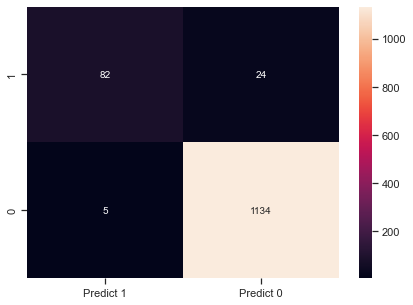

In [179]:
print('Confusion Matrix - SVM') #Confusion Matrix for SVM
cm1=metrics.confusion_matrix(y_test, svc_y_pred6, labels=[1, 0])
B_df_cm1 = pd.DataFrame(cm1, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(B_df_cm1, annot=True, fmt='d');

# Part 2.4 d

Share improvement from the base model to the finished model 
Performance Metrics of Modified KNN Model Over Base Model Improvement 1. 
Precision enhancing: Class 0: +41%; Class 0: +2%; Class 1: +2% 

2. Recall Improvement: Class 1 + 3%, Class 0 + 30%. 

3.Raise in F1-Score: (a) Class 0: +33%; Class 0: Class 1: +3% 

Additionally, a +6% improvement in accuracy and a 17% improvement in AUC are seen. 
from matrix 1 of confused. 
Real (+ve) 76 LoanOnCard (an increase from 44 from base model) 

2. LoanOnCard 1127 is true (-ve) (an increase from 1094 from base model) 

3.False (+ve) : (a "Type I error") 12 Type I mistake with false positive prediction (a reduction from 45 from base model)
4.False (-ve) False (a "Type II error") 30 false positive Type II error predictions (a reduction from 62 from base model) 

The modified SVM model outperformed the base model in terms of performance metrics in 1. Class 

1 (a): +6%; Class 0 (b): +49% 

2. Recall Enhancement: (a) Class 1: +2%, (b) Class 0: +63% 

3.F1-Score Development: (a) b) Class 0: +63% Class 1: +4% 

Additionally, a +7% increase in accuracy is seen, and the AUC has improved by 32%. from matrix  of confused. 
from matrix  of ambiguity. 
1. Real (+ve) 82 LoanOnCard (an increase from 15 from base model) 

2. True (-ve): LoanOnCard 1134 (an increase from 1121 from base model) 

3. False (+ve) (a "Type I error") 5 erroneously forecast a positive Type I error (a reduction from 18 from base model)

4.Untrue (-ve) (a "Type II error") 24 negatively predicted Type II error (a reduction from 91 from base model)